In [1]:
import pandas as pd
import numpy as np
import csv
import matplotlib.pyplot as plt
from tensorflow.keras.models import Sequential, load_model
from tensorflow.keras.layers import Dense
from sklearn.metrics import accuracy_score

In [2]:
car_v4 = pd.read_csv('/Users/kubs/Downloads/archive/car details v4.csv')
car_v4.head(5)

,Make,Model,Price,Year,Kilometer,Fuel Type,Transmission,Location,Color,Owner,Seller Type,Engine,Max Power,Max Torque,Drivetrain,Length,Width,Height,Seating Capacity,Fuel Tank Capacity
0,Honda,Amaze 1.2 VX i-VTEC,505000,2017,87150,Petrol,Manual,Pune,Grey,First,Corporate,1198 cc,87 bhp @ 6000 rpm,109 Nm @ 4500 rpm,FWD,3990.0,1680.0,1505.0,5.0,35.0
1,Maruti Suzuki,Swift DZire VDI,450000,2014,75000,Diesel,Manual,Ludhiana,White,Second,Individual,1248 cc,74 bhp @ 4000 rpm,190 Nm @ 2000 rpm,FWD,3995.0,1695.0,1555.0,5.0,42.0
2,Hyundai,i10 Magna 1.2 Kappa2,220000,2011,67000,Petrol,Manual,Lucknow,Maroon,First,Individual,1197 cc,79 bhp @ 6000 rpm,112.7619 Nm @ 4000 rpm,FWD,3585.0,1595.0,1550.0,5.0,35.0
3,Toyota,Glanza G,799000,2019,37500,Petrol,Manual,Mangalore,Red,First,Individual,1197 cc,82 bhp @ 6000 rpm,113 Nm @ 4200 rpm,FWD,3995.0,1745.0,1510.0,5.0,37.0
4,Toyota,Innova 2.4 VX 7 STR [2016-2020],1950000,2018,69000,Diesel,Manual,Mumbai,Grey,First,Individual,2393 cc,148 bhp @ 3400 rpm,343 Nm @ 1400 rpm,RWD,4735.0,1830.0,1795.0,7.0,55.0


In [3]:
# We want the price to be the Y, we want to factor in year, kilometer, number of owners, and fuel tank capacity

In [4]:
car_v4.sample(10)

,Make,Model,Price,Year,Kilometer,Fuel Type,Transmission,Location,Color,Owner,Seller Type,Engine,Max Power,Max Torque,Drivetrain,Length,Width,Height,Seating Capacity,Fuel Tank Capacity
356,Honda,Amaze 1.5 SX i-DTEC,385000,2013,72567,Diesel,Manual,Samastipur,White,First,Individual,1498 cc,99 bhp @ 3600 rpm,200 Nm @ 1750 rpm,FWD,3990.0,1680.0,1505.0,5.0,35.0
2026,Toyota,Etios Liva G,315000,2011,38091,Petrol,Manual,Mumbai,Red,First,Individual,1197 cc,80 bhp @ 5600 rpm,104 Nm @ 3100 rpm,FWD,3775.0,1695.0,1510.0,5.0,45.0
629,Hyundai,Verna Fluidic 1.6 CRDi,565000,2014,68000,Diesel,Manual,Lucknow,White,First,Individual,1582 cc,128 bhp @ 4000 rpm,260 Nm @ 1900 rpm,FWD,4370.0,1700.0,1475.0,5.0,43.0
315,Mercedes-Benz,S-Class S 350D [2018-2020],7900000,2017,11850,Diesel,Automatic,Vadodara,White,First,Individual,2925 cc,282 bhp @ 3600 rpm,600 Nm @ 1600 rpm,RWD,5246.0,1899.0,1494.0,5.0,70.0
533,Toyota,Fortuner 3.0 4x2 MT,1485000,2015,64120,Diesel,Manual,Delhi,White,Second,Individual,2982 cc,169 bhp @ 3600 rpm,343 Nm @ 1400 rpm,RWD,4705.0,1840.0,1850.0,7.0,80.0
36,Tata,Tigor Revotorq XT,490000,2018,43000,Diesel,Manual,Patna,White,First,Individual,1047 cc,69 bhp @ 4000 rpm,140 Nm @ 1800 rpm,FWD,3992.0,1677.0,1537.0,5.0,35.0
1556,Honda,City 1.5 V MT,400000,2013,76000,Petrol,Manual,Delhi,White,First,Individual,1497 cc,116 bhp @ 6600 rpm,146 Nm @ 4800 rpm,FWD,4440.0,1695.0,1485.0,5.0,42.0
1442,Hyundai,i20 Magna 1.2,245000,2011,41000,Petrol,Manual,Delhi,Red,First,Individual,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1690,Toyota,Innova 2.4 VX 8 STR [2016-2020],1998999,2019,71063,Diesel,Manual,Navi Mumbai,Silver,First,Individual,2393 cc,148 bhp @ 3400 rpm,343 Nm @ 1400 rpm,RWD,4735.0,1830.0,1795.0,8.0,55.0
167,Hyundai,Grand i10 Sportz (O) 1.2 Kappa VTVT [2017-2018],550000,2017,61400,Petrol,Manual,Aurangabad,Grey,First,Individual,1197 cc,81 bhp @ 6000 rpm,114 Nm @ 4000 rpm,FWD,3765.0,1660.0,1520.0,5.0,43.0


In [5]:
list_of_columns = ['Price', 'Year', 'Kilometer', 'Owner', 'Engine', 'Seating Capacity', 'Fuel Tank Capacity']

for i in car_v4.columns:
    if i not in list_of_columns:
        # drop column
        print(i)
        car_v4.drop([i], inplace = True, axis = 1)

Make
Model
Fuel Type
Transmission
Location
Color
Seller Type
Max Power
Max Torque
Drivetrain
Length
Width
Height


In [6]:
car_v4.sample(20)

,Price,Year,Kilometer,Owner,Engine,Seating Capacity,Fuel Tank Capacity
472,9390000,2022,14000,First,1950 cc,5.0,93.0
440,450000,2016,53300,First,1197 cc,5.0,43.0
648,375000,2012,78000,Third,NaN,NaN,NaN
446,525000,2018,78900,First,1120 cc,5.0,43.0
1233,969999,2016,39000,First,1248 cc,7.0,45.0
1290,1149000,2019,26894,First,1591 cc,5.0,45.0
1436,1199000,2020,26497,Second,1497 cc,5.0,40.0
930,540000,2014,86000,First,1582 cc,5.0,43.0
286,220000,2009,126535,First,1197 cc,5.0,35.0
1607,1525000,2016,32000,First,1968 cc,5.0,50.0


In [7]:
car_v4.Owner = car_v4.Owner.str.replace('First', '1')
car_v4.Owner = car_v4.Owner.str.replace('Second', '2')
car_v4.Owner = car_v4.Owner.str.replace('Third', '3')
car_v4.Owner = car_v4.Owner.str.replace('Fourth', '4')
car_v4.Owner = car_v4.Owner.str.replace('4 or More', '5')
car_v4.Owner = car_v4.Owner.str.replace('UnRegistered Car', '5')

In [8]:
car_v4.Engine = car_v4.Engine.str.replace('cc', '')
car_v4.Engine = car_v4.Engine.str.replace('cc', '')

In [9]:
car_v4.sample(15)

,Price,Year,Kilometer,Owner,Engine,Seating Capacity,Fuel Tank Capacity
257,4200000,2018,90868,1,1999,5.0,82.0
845,565000,2017,45000,1,1199,5.0,40.0
303,295000,2014,62500,1,1498,5.0,35.0
300,1090000,2012,65000,2,1995,5.0,67.0
1333,1350000,2015,60000,1,1968,5.0,50.0
841,1115000,2018,37000,2,1591,5.0,55.0
949,5250000,2020,28079,1,1950,5.0,66.0
1956,490000,2019,32000,1,999,5.0,28.0
79,1650000,2022,10000,1,1997,4.0,57.0
1819,650000,2018,32000,1,1197,5.0,37.0


In [10]:
car_v4.dropna(inplace = True)

In [11]:
from sklearn.model_selection import train_test_split

X = car_v4.drop(['Price'], axis = 1)
Y = car_v4['Price']

In [12]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.8)

In [13]:
train_data = X_train.join(Y_train)
train_data

,Year,Kilometer,Owner,Engine,Seating Capacity,Fuel Tank Capacity,Price
519,2011,65000,1,796,5.0,35.0,150000
1545,2018,47000,1,2967,7.0,75.0,5900000
1073,2017,68000,1,1197,5.0,37.0,561000
1694,2011,49200,1,1496,5.0,45.0,300000
1399,2019,28000,1,1086,5.0,60.0,465000
...,...,...,...,...,...,...,...
1904,2017,82000,1,1498,5.0,52.0,745000
297,2014,56000,1,1591,5.0,43.0,545000
975,2022,2700,1,1497,5.0,40.0,1095000
838,2018,50500,3,2143,5.0,93.0,5400000


array([[<Axes: title={'center': 'Year'}>,
        <Axes: title={'center': 'Kilometer'}>],
       [<Axes: title={'center': 'Seating Capacity'}>,
        <Axes: title={'center': 'Fuel Tank Capacity'}>],
       [<Axes: title={'center': 'Price'}>, <Axes: >]], dtype=object)

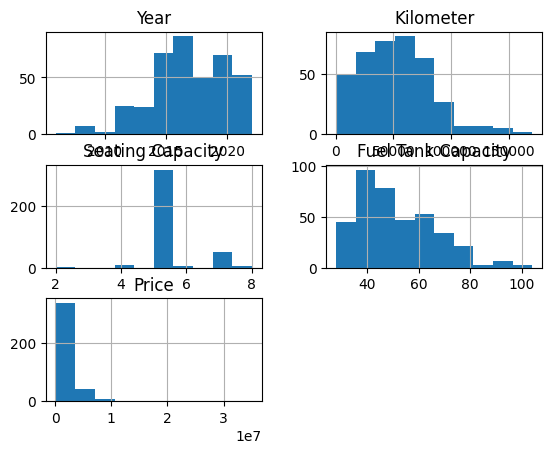

In [14]:
train_data.hist()

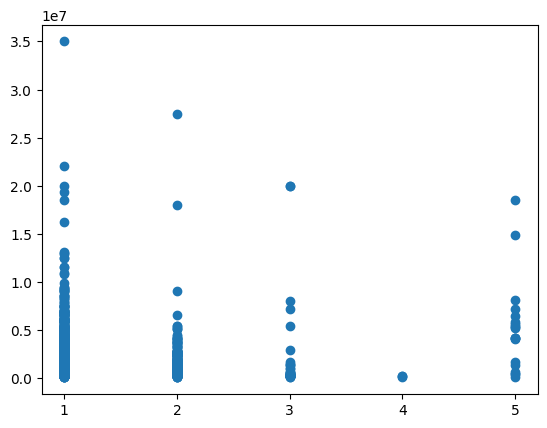

In [15]:
plt.scatter(car_v4['Owner'], car_v4['Price'])

In [16]:
from sklearn.linear_model import LinearRegression

clf = LinearRegression()

In [17]:
clf.fit(X_train, Y_train)

LinearRegression()

In [26]:
clf.predict(X_test)

array([6652130.48082232, -625545.01520556, 3916190.2998457 , ...,
       5436674.74168724, 4651888.48179322,  490187.67529929])

In [27]:
clf.score(X_test,Y_test)

0.40617080138676276

In [1]:
import pandas as pd
import numpy as np
import csv
import matplotlib.pyplot as plt
from tensorflow.keras.models import Sequential, load_model
from tensorflow.keras.layers import Dense
from sklearn.metrics import accuracy_score

In [2]:
car_v4 = pd.read_csv('/Users/kubs/Downloads/archive/car details v4.csv')
car_v4.head(5)

,Make,Model,Price,Year,Kilometer,Fuel Type,Transmission,Location,Color,Owner,Seller Type,Engine,Max Power,Max Torque,Drivetrain,Length,Width,Height,Seating Capacity,Fuel Tank Capacity
0,Honda,Amaze 1.2 VX i-VTEC,505000,2017,87150,Petrol,Manual,Pune,Grey,First,Corporate,1198 cc,87 bhp @ 6000 rpm,109 Nm @ 4500 rpm,FWD,3990.0,1680.0,1505.0,5.0,35.0
1,Maruti Suzuki,Swift DZire VDI,450000,2014,75000,Diesel,Manual,Ludhiana,White,Second,Individual,1248 cc,74 bhp @ 4000 rpm,190 Nm @ 2000 rpm,FWD,3995.0,1695.0,1555.0,5.0,42.0
2,Hyundai,i10 Magna 1.2 Kappa2,220000,2011,67000,Petrol,Manual,Lucknow,Maroon,First,Individual,1197 cc,79 bhp @ 6000 rpm,112.7619 Nm @ 4000 rpm,FWD,3585.0,1595.0,1550.0,5.0,35.0
3,Toyota,Glanza G,799000,2019,37500,Petrol,Manual,Mangalore,Red,First,Individual,1197 cc,82 bhp @ 6000 rpm,113 Nm @ 4200 rpm,FWD,3995.0,1745.0,1510.0,5.0,37.0
4,Toyota,Innova 2.4 VX 7 STR [2016-2020],1950000,2018,69000,Diesel,Manual,Mumbai,Grey,First,Individual,2393 cc,148 bhp @ 3400 rpm,343 Nm @ 1400 rpm,RWD,4735.0,1830.0,1795.0,7.0,55.0


In [3]:
# We want the price to be the Y, we want to factor in year, kilometer, number of owners, and fuel tank capacity

In [4]:
car_v4.sample(10)

,Make,Model,Price,Year,Kilometer,Fuel Type,Transmission,Location,Color,Owner,Seller Type,Engine,Max Power,Max Torque,Drivetrain,Length,Width,Height,Seating Capacity,Fuel Tank Capacity
356,Honda,Amaze 1.5 SX i-DTEC,385000,2013,72567,Diesel,Manual,Samastipur,White,First,Individual,1498 cc,99 bhp @ 3600 rpm,200 Nm @ 1750 rpm,FWD,3990.0,1680.0,1505.0,5.0,35.0
2026,Toyota,Etios Liva G,315000,2011,38091,Petrol,Manual,Mumbai,Red,First,Individual,1197 cc,80 bhp @ 5600 rpm,104 Nm @ 3100 rpm,FWD,3775.0,1695.0,1510.0,5.0,45.0
629,Hyundai,Verna Fluidic 1.6 CRDi,565000,2014,68000,Diesel,Manual,Lucknow,White,First,Individual,1582 cc,128 bhp @ 4000 rpm,260 Nm @ 1900 rpm,FWD,4370.0,1700.0,1475.0,5.0,43.0
315,Mercedes-Benz,S-Class S 350D [2018-2020],7900000,2017,11850,Diesel,Automatic,Vadodara,White,First,Individual,2925 cc,282 bhp @ 3600 rpm,600 Nm @ 1600 rpm,RWD,5246.0,1899.0,1494.0,5.0,70.0
533,Toyota,Fortuner 3.0 4x2 MT,1485000,2015,64120,Diesel,Manual,Delhi,White,Second,Individual,2982 cc,169 bhp @ 3600 rpm,343 Nm @ 1400 rpm,RWD,4705.0,1840.0,1850.0,7.0,80.0
36,Tata,Tigor Revotorq XT,490000,2018,43000,Diesel,Manual,Patna,White,First,Individual,1047 cc,69 bhp @ 4000 rpm,140 Nm @ 1800 rpm,FWD,3992.0,1677.0,1537.0,5.0,35.0
1556,Honda,City 1.5 V MT,400000,2013,76000,Petrol,Manual,Delhi,White,First,Individual,1497 cc,116 bhp @ 6600 rpm,146 Nm @ 4800 rpm,FWD,4440.0,1695.0,1485.0,5.0,42.0
1442,Hyundai,i20 Magna 1.2,245000,2011,41000,Petrol,Manual,Delhi,Red,First,Individual,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1690,Toyota,Innova 2.4 VX 8 STR [2016-2020],1998999,2019,71063,Diesel,Manual,Navi Mumbai,Silver,First,Individual,2393 cc,148 bhp @ 3400 rpm,343 Nm @ 1400 rpm,RWD,4735.0,1830.0,1795.0,8.0,55.0
167,Hyundai,Grand i10 Sportz (O) 1.2 Kappa VTVT [2017-2018],550000,2017,61400,Petrol,Manual,Aurangabad,Grey,First,Individual,1197 cc,81 bhp @ 6000 rpm,114 Nm @ 4000 rpm,FWD,3765.0,1660.0,1520.0,5.0,43.0


In [5]:
list_of_columns = ['Price', 'Year', 'Kilometer', 'Owner', 'Engine', 'Seating Capacity', 'Fuel Tank Capacity']

for i in car_v4.columns:
    if i not in list_of_columns:
        # drop column
        print(i)
        car_v4.drop([i], inplace = True, axis = 1)

Make
Model
Fuel Type
Transmission
Location
Color
Seller Type
Max Power
Max Torque
Drivetrain
Length
Width
Height


In [6]:
car_v4.sample(20)

,Price,Year,Kilometer,Owner,Engine,Seating Capacity,Fuel Tank Capacity
472,9390000,2022,14000,First,1950 cc,5.0,93.0
440,450000,2016,53300,First,1197 cc,5.0,43.0
648,375000,2012,78000,Third,NaN,NaN,NaN
446,525000,2018,78900,First,1120 cc,5.0,43.0
1233,969999,2016,39000,First,1248 cc,7.0,45.0
1290,1149000,2019,26894,First,1591 cc,5.0,45.0
1436,1199000,2020,26497,Second,1497 cc,5.0,40.0
930,540000,2014,86000,First,1582 cc,5.0,43.0
286,220000,2009,126535,First,1197 cc,5.0,35.0
1607,1525000,2016,32000,First,1968 cc,5.0,50.0


In [7]:
car_v4.Owner = car_v4.Owner.str.replace('First', '1')
car_v4.Owner = car_v4.Owner.str.replace('Second', '2')
car_v4.Owner = car_v4.Owner.str.replace('Third', '3')
car_v4.Owner = car_v4.Owner.str.replace('Fourth', '4')
car_v4.Owner = car_v4.Owner.str.replace('4 or More', '5')
car_v4.Owner = car_v4.Owner.str.replace('UnRegistered Car', '5')

In [8]:
car_v4.Engine = car_v4.Engine.str.replace('cc', '')
car_v4.Engine = car_v4.Engine.str.replace('cc', '')

In [9]:
car_v4.sample(15)

,Price,Year,Kilometer,Owner,Engine,Seating Capacity,Fuel Tank Capacity
257,4200000,2018,90868,1,1999,5.0,82.0
845,565000,2017,45000,1,1199,5.0,40.0
303,295000,2014,62500,1,1498,5.0,35.0
300,1090000,2012,65000,2,1995,5.0,67.0
1333,1350000,2015,60000,1,1968,5.0,50.0
841,1115000,2018,37000,2,1591,5.0,55.0
949,5250000,2020,28079,1,1950,5.0,66.0
1956,490000,2019,32000,1,999,5.0,28.0
79,1650000,2022,10000,1,1997,4.0,57.0
1819,650000,2018,32000,1,1197,5.0,37.0


In [10]:
car_v4.dropna(inplace = True)

In [11]:
from sklearn.model_selection import train_test_split

X = car_v4.drop(['Price'], axis = 1)
Y = car_v4['Price']

In [12]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.8)

In [13]:
train_data = X_train.join(Y_train)
train_data

,Year,Kilometer,Owner,Engine,Seating Capacity,Fuel Tank Capacity,Price
519,2011,65000,1,796,5.0,35.0,150000
1545,2018,47000,1,2967,7.0,75.0,5900000
1073,2017,68000,1,1197,5.0,37.0,561000
1694,2011,49200,1,1496,5.0,45.0,300000
1399,2019,28000,1,1086,5.0,60.0,465000
...,...,...,...,...,...,...,...
1904,2017,82000,1,1498,5.0,52.0,745000
297,2014,56000,1,1591,5.0,43.0,545000
975,2022,2700,1,1497,5.0,40.0,1095000
838,2018,50500,3,2143,5.0,93.0,5400000


array([[<Axes: title={'center': 'Year'}>,
        <Axes: title={'center': 'Kilometer'}>],
       [<Axes: title={'center': 'Seating Capacity'}>,
        <Axes: title={'center': 'Fuel Tank Capacity'}>],
       [<Axes: title={'center': 'Price'}>, <Axes: >]], dtype=object)

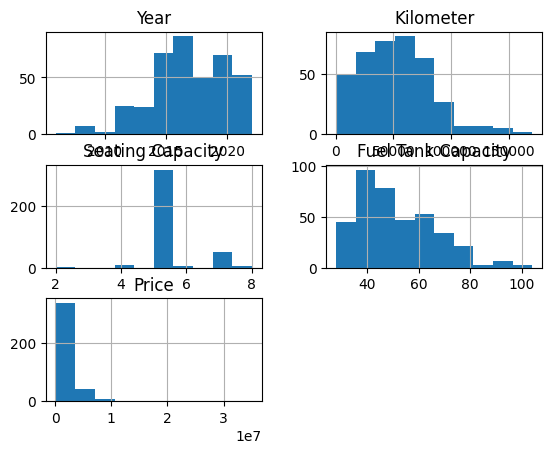

In [14]:
train_data.hist()

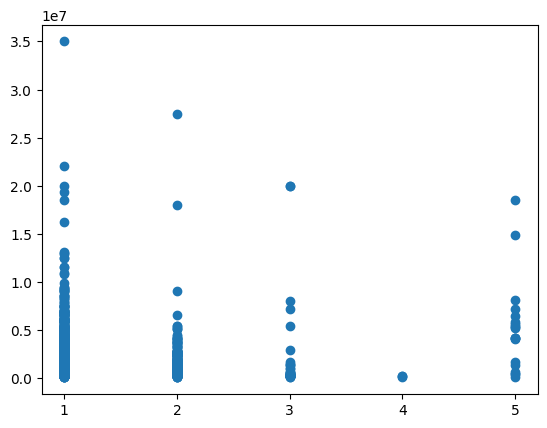

In [15]:
plt.scatter(car_v4['Owner'], car_v4['Price'])

In [16]:
from sklearn.linear_model import LinearRegression

clf = LinearRegression()

In [17]:
clf.fit(X_train, Y_train)

LinearRegression()

In [26]:
clf.predict(X_test)

array([6652130.48082232, -625545.01520556, 3916190.2998457 , ...,
       5436674.74168724, 4651888.48179322,  490187.67529929])

In [27]:
clf.score(X_test,Y_test)

0.40617080138676276

In [1]:
import pandas as pd
import numpy as np
import csv
import matplotlib.pyplot as plt
from tensorflow.keras.models import Sequential, load_model
from tensorflow.keras.layers import Dense
from sklearn.metrics import accuracy_score

In [2]:
car_v4 = pd.read_csv('/Users/kubs/Downloads/archive/car details v4.csv')
car_v4.head(5)

,Make,Model,Price,Year,Kilometer,Fuel Type,Transmission,Location,Color,Owner,Seller Type,Engine,Max Power,Max Torque,Drivetrain,Length,Width,Height,Seating Capacity,Fuel Tank Capacity
0,Honda,Amaze 1.2 VX i-VTEC,505000,2017,87150,Petrol,Manual,Pune,Grey,First,Corporate,1198 cc,87 bhp @ 6000 rpm,109 Nm @ 4500 rpm,FWD,3990.0,1680.0,1505.0,5.0,35.0
1,Maruti Suzuki,Swift DZire VDI,450000,2014,75000,Diesel,Manual,Ludhiana,White,Second,Individual,1248 cc,74 bhp @ 4000 rpm,190 Nm @ 2000 rpm,FWD,3995.0,1695.0,1555.0,5.0,42.0
2,Hyundai,i10 Magna 1.2 Kappa2,220000,2011,67000,Petrol,Manual,Lucknow,Maroon,First,Individual,1197 cc,79 bhp @ 6000 rpm,112.7619 Nm @ 4000 rpm,FWD,3585.0,1595.0,1550.0,5.0,35.0
3,Toyota,Glanza G,799000,2019,37500,Petrol,Manual,Mangalore,Red,First,Individual,1197 cc,82 bhp @ 6000 rpm,113 Nm @ 4200 rpm,FWD,3995.0,1745.0,1510.0,5.0,37.0
4,Toyota,Innova 2.4 VX 7 STR [2016-2020],1950000,2018,69000,Diesel,Manual,Mumbai,Grey,First,Individual,2393 cc,148 bhp @ 3400 rpm,343 Nm @ 1400 rpm,RWD,4735.0,1830.0,1795.0,7.0,55.0


In [3]:
# We want the price to be the Y, we want to factor in year, kilometer, number of owners, and fuel tank capacity

In [4]:
car_v4.sample(10)

,Make,Model,Price,Year,Kilometer,Fuel Type,Transmission,Location,Color,Owner,Seller Type,Engine,Max Power,Max Torque,Drivetrain,Length,Width,Height,Seating Capacity,Fuel Tank Capacity
356,Honda,Amaze 1.5 SX i-DTEC,385000,2013,72567,Diesel,Manual,Samastipur,White,First,Individual,1498 cc,99 bhp @ 3600 rpm,200 Nm @ 1750 rpm,FWD,3990.0,1680.0,1505.0,5.0,35.0
2026,Toyota,Etios Liva G,315000,2011,38091,Petrol,Manual,Mumbai,Red,First,Individual,1197 cc,80 bhp @ 5600 rpm,104 Nm @ 3100 rpm,FWD,3775.0,1695.0,1510.0,5.0,45.0
629,Hyundai,Verna Fluidic 1.6 CRDi,565000,2014,68000,Diesel,Manual,Lucknow,White,First,Individual,1582 cc,128 bhp @ 4000 rpm,260 Nm @ 1900 rpm,FWD,4370.0,1700.0,1475.0,5.0,43.0
315,Mercedes-Benz,S-Class S 350D [2018-2020],7900000,2017,11850,Diesel,Automatic,Vadodara,White,First,Individual,2925 cc,282 bhp @ 3600 rpm,600 Nm @ 1600 rpm,RWD,5246.0,1899.0,1494.0,5.0,70.0
533,Toyota,Fortuner 3.0 4x2 MT,1485000,2015,64120,Diesel,Manual,Delhi,White,Second,Individual,2982 cc,169 bhp @ 3600 rpm,343 Nm @ 1400 rpm,RWD,4705.0,1840.0,1850.0,7.0,80.0
36,Tata,Tigor Revotorq XT,490000,2018,43000,Diesel,Manual,Patna,White,First,Individual,1047 cc,69 bhp @ 4000 rpm,140 Nm @ 1800 rpm,FWD,3992.0,1677.0,1537.0,5.0,35.0
1556,Honda,City 1.5 V MT,400000,2013,76000,Petrol,Manual,Delhi,White,First,Individual,1497 cc,116 bhp @ 6600 rpm,146 Nm @ 4800 rpm,FWD,4440.0,1695.0,1485.0,5.0,42.0
1442,Hyundai,i20 Magna 1.2,245000,2011,41000,Petrol,Manual,Delhi,Red,First,Individual,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1690,Toyota,Innova 2.4 VX 8 STR [2016-2020],1998999,2019,71063,Diesel,Manual,Navi Mumbai,Silver,First,Individual,2393 cc,148 bhp @ 3400 rpm,343 Nm @ 1400 rpm,RWD,4735.0,1830.0,1795.0,8.0,55.0
167,Hyundai,Grand i10 Sportz (O) 1.2 Kappa VTVT [2017-2018],550000,2017,61400,Petrol,Manual,Aurangabad,Grey,First,Individual,1197 cc,81 bhp @ 6000 rpm,114 Nm @ 4000 rpm,FWD,3765.0,1660.0,1520.0,5.0,43.0


In [5]:
list_of_columns = ['Price', 'Year', 'Kilometer', 'Owner', 'Engine', 'Seating Capacity', 'Fuel Tank Capacity']

for i in car_v4.columns:
    if i not in list_of_columns:
        # drop column
        print(i)
        car_v4.drop([i], inplace = True, axis = 1)

Make
Model
Fuel Type
Transmission
Location
Color
Seller Type
Max Power
Max Torque
Drivetrain
Length
Width
Height


In [6]:
car_v4.sample(20)

,Price,Year,Kilometer,Owner,Engine,Seating Capacity,Fuel Tank Capacity
472,9390000,2022,14000,First,1950 cc,5.0,93.0
440,450000,2016,53300,First,1197 cc,5.0,43.0
648,375000,2012,78000,Third,NaN,NaN,NaN
446,525000,2018,78900,First,1120 cc,5.0,43.0
1233,969999,2016,39000,First,1248 cc,7.0,45.0
1290,1149000,2019,26894,First,1591 cc,5.0,45.0
1436,1199000,2020,26497,Second,1497 cc,5.0,40.0
930,540000,2014,86000,First,1582 cc,5.0,43.0
286,220000,2009,126535,First,1197 cc,5.0,35.0
1607,1525000,2016,32000,First,1968 cc,5.0,50.0


In [7]:
car_v4.Owner = car_v4.Owner.str.replace('First', '1')
car_v4.Owner = car_v4.Owner.str.replace('Second', '2')
car_v4.Owner = car_v4.Owner.str.replace('Third', '3')
car_v4.Owner = car_v4.Owner.str.replace('Fourth', '4')
car_v4.Owner = car_v4.Owner.str.replace('4 or More', '5')
car_v4.Owner = car_v4.Owner.str.replace('UnRegistered Car', '5')

In [8]:
car_v4.Engine = car_v4.Engine.str.replace('cc', '')
car_v4.Engine = car_v4.Engine.str.replace('cc', '')

In [9]:
car_v4.sample(15)

,Price,Year,Kilometer,Owner,Engine,Seating Capacity,Fuel Tank Capacity
257,4200000,2018,90868,1,1999,5.0,82.0
845,565000,2017,45000,1,1199,5.0,40.0
303,295000,2014,62500,1,1498,5.0,35.0
300,1090000,2012,65000,2,1995,5.0,67.0
1333,1350000,2015,60000,1,1968,5.0,50.0
841,1115000,2018,37000,2,1591,5.0,55.0
949,5250000,2020,28079,1,1950,5.0,66.0
1956,490000,2019,32000,1,999,5.0,28.0
79,1650000,2022,10000,1,1997,4.0,57.0
1819,650000,2018,32000,1,1197,5.0,37.0


In [10]:
car_v4.dropna(inplace = True)

In [11]:
from sklearn.model_selection import train_test_split

X = car_v4.drop(['Price'], axis = 1)
Y = car_v4['Price']

In [12]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.8)

In [13]:
train_data = X_train.join(Y_train)
train_data

,Year,Kilometer,Owner,Engine,Seating Capacity,Fuel Tank Capacity,Price
519,2011,65000,1,796,5.0,35.0,150000
1545,2018,47000,1,2967,7.0,75.0,5900000
1073,2017,68000,1,1197,5.0,37.0,561000
1694,2011,49200,1,1496,5.0,45.0,300000
1399,2019,28000,1,1086,5.0,60.0,465000
...,...,...,...,...,...,...,...
1904,2017,82000,1,1498,5.0,52.0,745000
297,2014,56000,1,1591,5.0,43.0,545000
975,2022,2700,1,1497,5.0,40.0,1095000
838,2018,50500,3,2143,5.0,93.0,5400000


array([[<Axes: title={'center': 'Year'}>,
        <Axes: title={'center': 'Kilometer'}>],
       [<Axes: title={'center': 'Seating Capacity'}>,
        <Axes: title={'center': 'Fuel Tank Capacity'}>],
       [<Axes: title={'center': 'Price'}>, <Axes: >]], dtype=object)

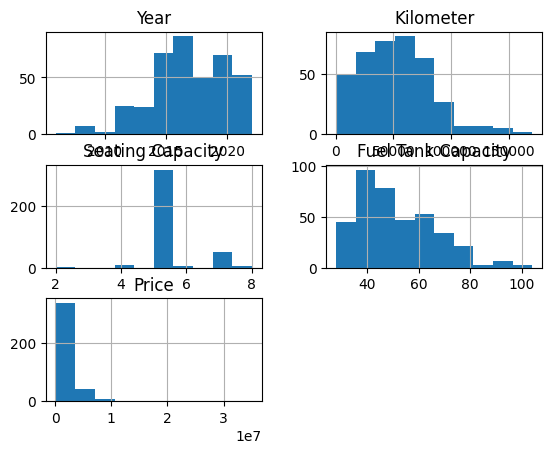

In [14]:
train_data.hist()

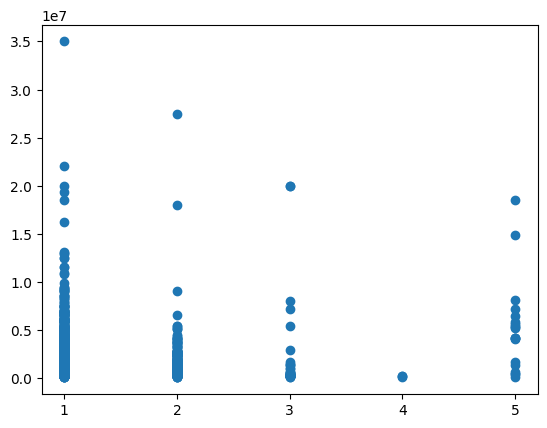

In [15]:
plt.scatter(car_v4['Owner'], car_v4['Price'])

In [16]:
from sklearn.linear_model import LinearRegression

clf = LinearRegression()

In [17]:
clf.fit(X_train, Y_train)

LinearRegression()

In [26]:
clf.predict(X_test)

array([6652130.48082232, -625545.01520556, 3916190.2998457 , ...,
       5436674.74168724, 4651888.48179322,  490187.67529929])

In [27]:
clf.score(X_test,Y_test)

0.40617080138676276